### Aplicación de K-MEANS a la corrupción, lapsos 3 años, 2003 a 2022
### Obtención de gráficos de cluster para distintos períodos de 3 años

---


#### Cargamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [2]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
data_aspectos = {
    'aspecto': ['CORRUPCIÓN'],
    'var_1': ['per304'],
    'var_2': ['per603'],
    'var_3': ['per604'],
    'var_4': ['per605']
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3,var_4
0,CORRUPCIÓN,per304,per603,per604,per605


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [3]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Corrupción Política', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Protección del Medioambiente', 'Culture: Positive', 'Igualdad

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta'), y el 'aspecto'

In [4]:
# Cargar el dataset principal
# Nota: 'data/MP_Dataset_KMeans_mean.xlsx' se genera desde el data set 'crudo' del Manifesto Project (notebook 'Crea_df_ponderado.ipynb'),
# el cual ha sido ponderado por 'presvote' o 'pervote' y se le ha agregado la columna 'agno'
# Se han eliminado filas con valores NaN y columnas que NO son necesarias para K-MEANS (ventana_5, ventan_10, tipovoto)

file_path = './data/MP_Dataset_KMeans_mean.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'CORRUPCIÓN'
desde = 2003
hasta = 2005

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3', 'var_4']].dropna().values.flatten()

In [5]:
df

,agno,countryname,ventana_10,ventana_5,tipovoto,per101,per102,per103,per104,per105,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,1997,Albania,190,16,pervote,1.770988,0.000000,0.031388,3.046506,0.015910,...,2.021481,0.0,0.0,0.0,0.0,0.0,0.637892,0.363756,0.0,0.0
1,2001,Albania,200,17,pervote,2.392570,0.000000,0.000000,2.757403,0.026619,...,0.989546,0.0,0.0,0.0,0.0,0.0,0.897238,0.508457,0.0,0.0
2,1989,Argentina,180,14,presvote,0.000000,0.000000,4.619213,0.448618,0.828036,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,1995,Argentina,190,16,presvote,0.061642,0.020140,0.143247,0.882433,0.083005,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,1999,Argentina,190,16,presvote,0.192543,0.000000,0.582363,0.524400,0.017829,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,200,18,pervote,1.978711,0.088485,0.044020,5.839310,0.088485,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
735,2012,United States,210,19,presvote,0.505120,0.161887,0.189797,7.527242,1.491961,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
736,2016,United States,210,20,presvote,0.866280,0.111349,0.000000,5.807609,0.763045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
737,2020,United States,220,21,presvote,1.190682,0.129249,0.161450,5.565559,1.951804,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [6]:
df.columns

Index(['agno', 'countryname', 'ventana_10', 'ventana_5', 'tipovoto', 'per101',
       'per102', 'per103', 'per104', 'per105',
       ...
       'per6013', 'per6014', 'per6061', 'per6071', 'per6072', 'per6081',
       'per7051', 'per7052', 'per7061', 'per7062'],
      dtype='object', length=115)

### Analicemos la distribución de las variables seleccionadas en todo el dataset (todos los períodos) 

In [7]:
# selected_variables = variables
# selected_variables
selected_variables = ['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']
df_selected = df[selected_variables]

In [8]:
# Lista de variables 'per' seleccionadas para el análisis
selected_variables = variables  # Asegúrate de que esta lista ya contenga las variables relevantes

# Asegurar que las variables existen en el DataFrame
selected_variables = [var for var in selected_variables if var in df.columns]

# Filtrar el dataframe para las columnas seleccionadas
df_selected = df[selected_variables].fillna(0)  # Rellenar valores NaN con 0

# Obtener el detalle de las variables del DataFrame 'df_AD'
variable_details = dict(zip(df_AD['Variable_per'], df_AD['Detalle_Dominio']))

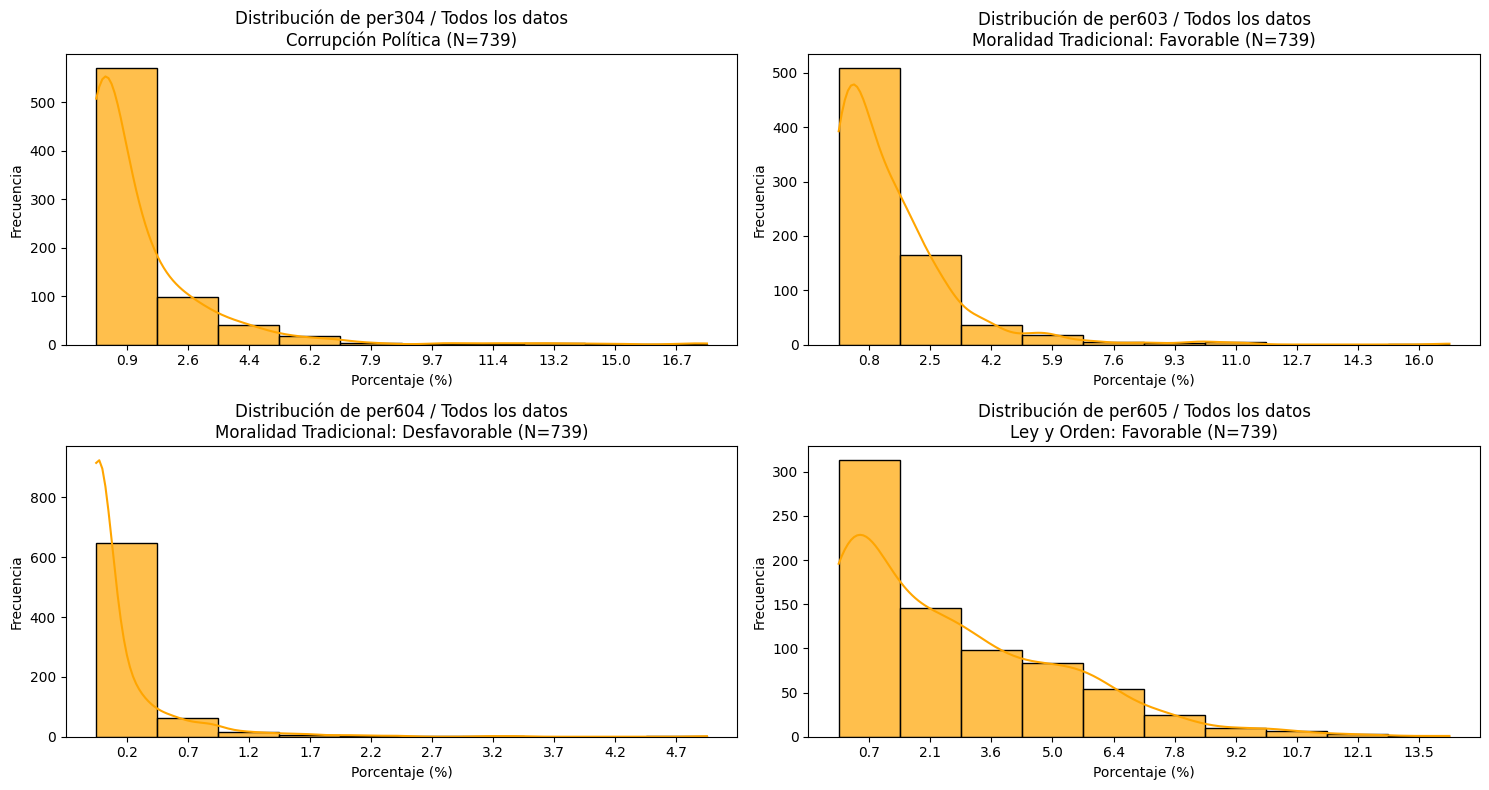

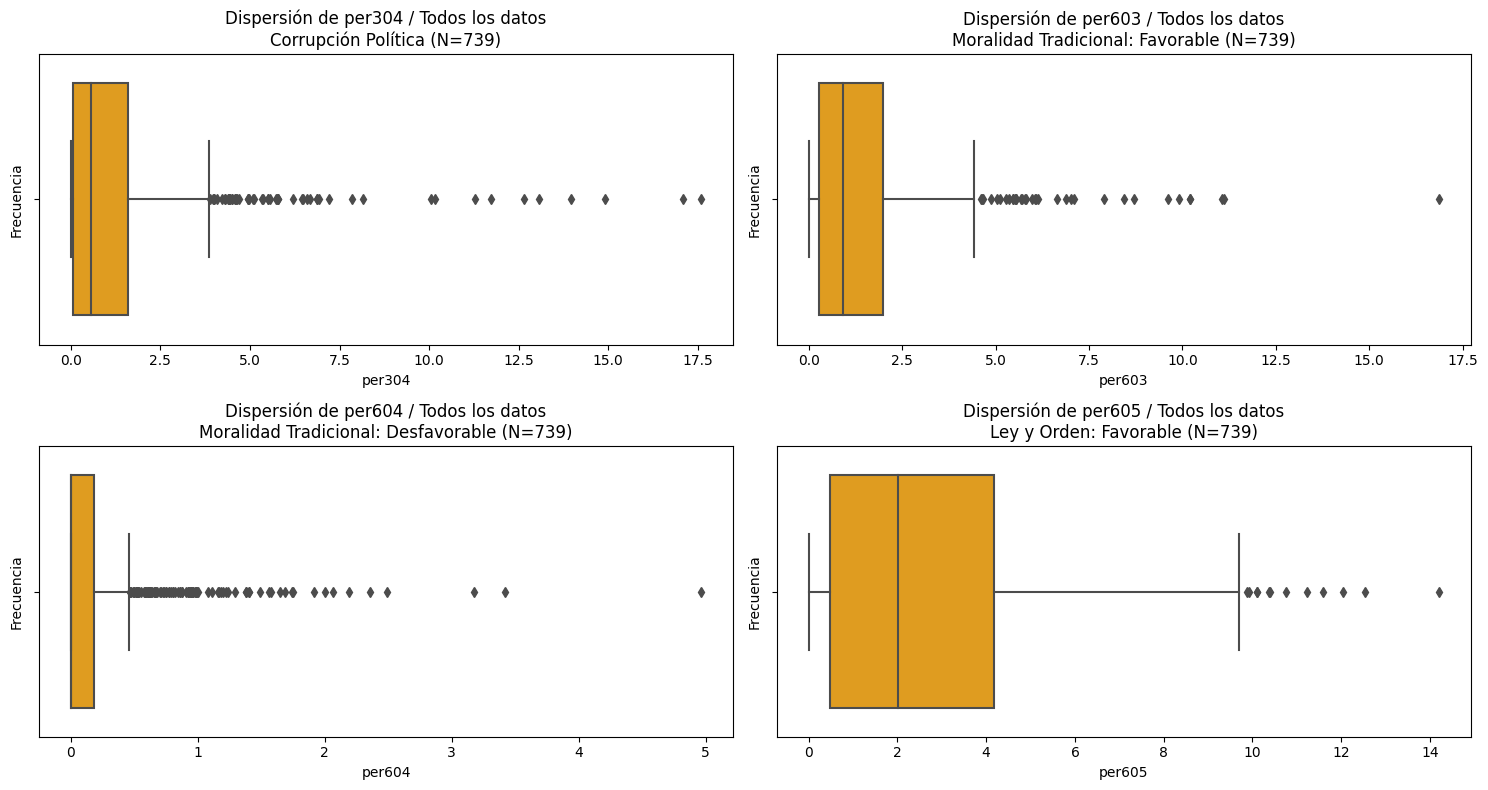

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualizar histogramas para las variables seleccionadas
num_variables = len(selected_variables)
plt.figure(figsize=(15, num_variables * 2))  # Ajustar altura del gráfico en función de las variables

for i, var in enumerate(selected_variables):
    plt.subplot((num_variables + 1) // 2, 2, i + 1)  # Dos gráficos por línea
    
    # Usar sns.histplot para trazar el histograma
    hist = sns.histplot(df_selected[var], kde=True, bins=10, color='orange', alpha=0.7)
    
    # Configurar etiquetas en el centro de cada barra
    bins = hist.patches
    bin_centers = [bar.get_x() + bar.get_width() / 2 for bar in bins]
    bin_labels = [f'{center:.1f}' for center in bin_centers]
    plt.xticks(bin_centers, bin_labels)
    
    # Detalles adicionales
    detail = variable_details.get(var, "Detalle no disponible")  # Obtener detalle o indicar no disponible
    count = len(df_selected[var])  # Número total de datos
    zeros = (df_selected[var] == 0).sum()  # Número de valores iguales a cero
    plt.title(f'Distribución de {var} / Todos los datos\n{detail} (N={count})')
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizar boxplots para observar la dispersión de las variables seleccionadas
plt.figure(figsize=(15, num_variables * 2))  # Ajustar altura del gráfico en función de las variables

for i, var in enumerate(selected_variables):
    plt.subplot((num_variables + 1) // 2, 2, i + 1)  # Dos gráficos por línea
    
    # Trazar el boxplot
    sns.boxplot(x=df_selected[var], color='orange')
    
    # Detalles adicionales
    detail = variable_details.get(var, "Detalle no disponible")  # Obtener detalle o indicar no disponible
    count = len(df_selected[var])  # Número total de datos
    zeros = (df_selected[var] == 0).sum()  # Número de valores iguales a cero
    plt.title(f'Dispersión de {var} / Todos los datos\n{detail} (N={count})')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [10]:
df_selected.describe().T.to_excel('resumen_estadistico.xlsx')

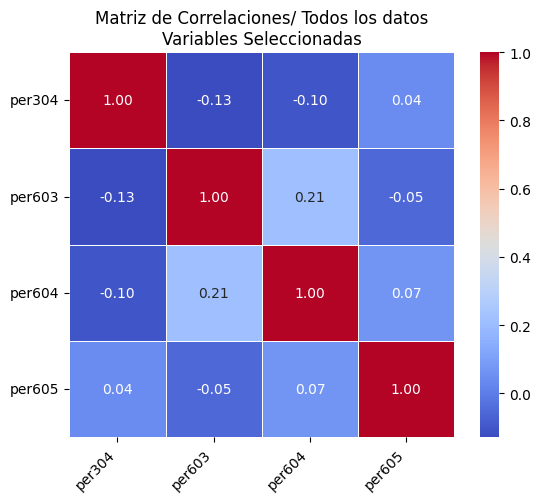

No hay variables con correlación mayor al umbral establecido.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlaciones para las variables seleccionadas
correlation_matrix = df_selected[selected_variables].corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5, 
    square=True
)
plt.title("Matriz de Correlaciones/ Todos los datos\nVariables Seleccionadas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


#### Análisis de las correlaciones: ********** REVISAR*********
* La máxima correlación posotiva es 0,29: Las variables tienen alguna relación en ciertos contextos, pero no son interdependientes de manera significativa en la mayoría de los casos.
* La máxima correlación negativa es -0,13: Hay competencia leve entre algunas variables, pero no es significativa. Esto puede deberse a que las variables representan temas conceptualmente distintos o porque la variabilidad es muy baja
* La falta de correlaciones fuertes sugiere que las variables están actuando de manera relativamente independiente, lo cual es valioso para el análisis de clusters.


#### COMENTARIO a la distribución de las variables seleccionadas considerando todo el dataset: ********** REVISAR*********
* El hecho de que las variables 'per' estén normalizadas y deban sumar 1 para cada año-país introduce dependencia entre las variables
* Esto significa que si una o más variables tienen valores altos en un año-país específico, necesariamente las otras variables tendrán valores bajos, incluso 0, para mantener la suma constante
* Como hay muchas combinaciones año-país donde ciertas variables 'per' tienen poca relevancia (p. ej., corrupción o drogas no son temas prioritarios en ciertos contextos), sus valores tienden a ser pequeños o nulos en esos casos
* Estas pequeñas proporciones hacen que los histogramas tengan muchas barras concentradas cerca de 0, lo que explica la forma sesgada hacia la izquierda
* La media baja y la desviación estándar alta reflejan que la mayoría de los valores son pequeños (cercanos a 0), pero hay algunos casos donde la variable es prioritaria y tiene valores más grandes, aumentando la dispersión
* Es probable ver correlaciones negativas entre algunas variables 'per', ya que un aumento en una variable implica necesariamente una disminución en otras
* Las distribuciones cargadas a la izquierda son un resultado esperado y están directamente relacionadas con la naturaleza de los datos
* Este comportamiento no indica un error en el modelo o en el análisis, sino una característica inherente de los programas presidenciales, donde ciertos temas dominan mientras otros son secundarios o ausentes


#### Reproceso

#### Extraemos  las columnas 'per' principales (per101 a per706)

In [12]:
# Filtrar las columnas que comienzan con 'per' y tienen longitud 6
per_columns = [col for col in df.columns if col.startswith('per') and len(col) == 6]

# Crear el DataFrame 'df_s' con las columnas 'agno', 'countryname' y las columnas seleccionadas
columns_to_extract = ['agno', 'countryname'] + per_columns
df_s = df[columns_to_extract].copy()

# Mostrar el resultado
print("Columnas seleccionadas para 'df_s':")
print(columns_to_extract)
display(df_s.head())


Columnas seleccionadas para 'df_s':
['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105', 'per106', 'per107', 'per108', 'per109', 'per110', 'per201', 'per202', 'per203', 'per204', 'per301', 'per302', 'per303', 'per304', 'per305', 'per401', 'per402', 'per403', 'per404', 'per405', 'per406', 'per407', 'per408', 'per409', 'per410', 'per411', 'per412', 'per413', 'per414', 'per415', 'per416', 'per501', 'per502', 'per503', 'per504', 'per505', 'per506', 'per507', 'per601', 'per602', 'per603', 'per604', 'per605', 'per606', 'per607', 'per608', 'per701', 'per702', 'per703', 'per704', 'per705', 'per706']


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,1.770988,0.00000,0.031388,3.046506,0.015910,0.032313,3.406129,1.114989,...,6.169728,0.693075,0.047278,0.0,0.653683,0.000000,7.209393,0.000000,0.432663,3.775716
1,2001,Albania,2.392570,0.00000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,4.998334,0.559072,0.008873,0.0,0.221163,0.000000,12.047034,0.000000,0.542726,5.413989
2,1989,Argentina,0.000000,0.00000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,1.449244,7.595332,0.326532,0.0,6.796459,0.000000,2.495280,0.000000,0.204032,2.052427
3,1995,Argentina,0.061642,0.02014,0.143247,0.882433,0.083005,1.107286,1.996025,1.669947,...,0.760726,1.997920,0.323973,0.0,2.925856,0.000000,1.499031,0.000000,0.247097,1.202382
4,1999,Argentina,0.192543,0.00000,0.582363,0.524400,0.017829,0.613450,3.482869,2.262154,...,4.334891,2.496205,0.928464,0.0,2.535425,0.089349,1.074752,0.039445,0.899614,1.459349


#### Normalizamos las filas

In [13]:
# Identificar las columnas que comienzan con 'per'
per_columns = [col for col in df_s.columns if col.startswith('per')]

# Calcular la suma de las columnas 'per' para cada fila
df_s['per_sum'] = df_s[per_columns].sum(axis=1)

# Identificar las filas que necesitan normalización (donde la suma no sea 100)
rows_to_normalize = df_s['per_sum'] != 100

# Normalizar las filas afectadas dividiendo cada valor por la suma y multiplicando por 100
df_s.loc[rows_to_normalize, per_columns] = df_s.loc[rows_to_normalize, per_columns].div(
    df_s.loc[rows_to_normalize, 'per_sum'], axis=0
) * 100

# Eliminar la columna auxiliar 'per_sum'
df_s.drop(columns=['per_sum'], inplace=True)

# Verificar que todas las filas ahora suman 100
assert df_s[per_columns].sum(axis=1).round(6).eq(100).all(), "Error: No todas las filas suman 100."

# Mostrar el resultado
print("Normalización completada. Primeras filas del DataFrame normalizado:")
display(df_s.head())


Normalización completada. Primeras filas del DataFrame normalizado:


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,2.047208,0.000000,0.036283,3.521667,0.018391,0.037353,3.937380,1.288893,...,7.132017,0.801174,0.054652,0.0,0.755637,0.000000,8.333838,0.00000,0.500146,4.364612
1,2001,Albania,2.761724,0.000000,0.000000,3.182847,0.030726,0.027643,4.066757,1.676930,...,5.769535,0.645332,0.010242,0.0,0.255287,0.000000,13.905792,0.00000,0.626465,6.249323
2,1989,Argentina,0.000000,0.000000,4.643342,0.450962,0.832361,0.339836,2.970526,0.000000,...,1.456814,7.635007,0.328238,0.0,6.831962,0.000000,2.508315,0.00000,0.205098,2.063148
3,1995,Argentina,0.062411,0.020391,0.145034,0.893437,0.084040,1.121093,2.020915,1.690770,...,0.770212,2.022833,0.328013,0.0,2.962340,0.000000,1.517723,0.00000,0.250178,1.217375
4,1999,Argentina,0.198715,0.000000,0.601030,0.541209,0.018401,0.633114,3.594509,2.334666,...,4.473842,2.576219,0.958226,0.0,2.616696,0.092213,1.109202,0.04071,0.928451,1.506127


In [14]:
df_s

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,2.047208,0.000000,0.036283,3.521667,0.018391,0.037353,3.937380,1.288893,...,7.132017,0.801174,0.054652,0.000000,0.755637,0.000000,8.333838,0.000000,0.500146,4.364612
1,2001,Albania,2.761724,0.000000,0.000000,3.182847,0.030726,0.027643,4.066757,1.676930,...,5.769535,0.645332,0.010242,0.000000,0.255287,0.000000,13.905792,0.000000,0.626465,6.249323
2,1989,Argentina,0.000000,0.000000,4.643342,0.450962,0.832361,0.339836,2.970526,0.000000,...,1.456814,7.635007,0.328238,0.000000,6.831962,0.000000,2.508315,0.000000,0.205098,2.063148
3,1995,Argentina,0.062411,0.020391,0.145034,0.893437,0.084040,1.121093,2.020915,1.690770,...,0.770212,2.022833,0.328013,0.000000,2.962340,0.000000,1.517723,0.000000,0.250178,1.217375
4,1999,Argentina,0.198715,0.000000,0.601030,0.541209,0.018401,0.633114,3.594509,2.334666,...,4.473842,2.576219,0.958226,0.000000,2.616696,0.092213,1.109202,0.040710,0.928451,1.506127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,1.984945,0.088763,0.044159,5.857707,0.088763,1.312416,8.891573,0.345031,...,4.334430,0.728650,1.943936,0.000000,2.209780,0.088763,1.115454,1.342674,2.227276,7.322999
735,2012,United States,0.530022,0.169868,0.199154,7.898335,1.565515,0.690478,6.373381,0.000000,...,2.972009,1.119096,1.189128,0.441646,4.945244,0.764126,1.771901,0.578133,0.349174,1.131101
736,2016,United States,0.876976,0.112724,0.000000,5.879314,0.772466,0.643428,4.727256,0.000000,...,2.608704,0.903579,2.237210,0.102436,3.378829,0.383163,1.678005,0.139327,0.000000,1.967061
737,2020,United States,1.215768,0.131972,0.164851,5.682818,1.992926,0.490682,3.990117,0.020806,...,2.758473,0.547629,2.592619,0.066797,3.766801,0.377867,2.033387,0.144578,0.041079,1.307767


In [15]:
# Exportar el DataFrame 'df_s' a un archivo Excel
output_file_path = './data/MP_ponderado_y_normalizado.xlsx'
df_s.to_excel(output_file_path, index=False)

print(f"DataFrame 'df_s' exportado exitosamente a {output_file_path}")

DataFrame 'df_s' exportado exitosamente a ./data/MP_ponderado_y_normalizado.xlsx


In [16]:
df_s.shape

(739, 58)

#### Identificamos valores NaN

In [17]:
# Verificar si hay valores NaN en el DataFrame
nan_rows = df_s[df_s.isnull().any(axis=1)]
num_nan_rows = len(nan_rows)

# Informar el número de filas con valores NaN
if num_nan_rows > 0:
    print(f"Se encontraron {num_nan_rows} filas con valores NaN.")
else:
    print("No se encontraron filas con valores NaN.")

# Eliminar las filas con valores NaN
df_s = df_s.dropna()

# Verificar el número de filas restantes
print(f"Filas restantes después de eliminar valores NaN: {len(df_s)}")

# Mostrar un ejemplo del DataFrame limpio
display(df_s.head())


No se encontraron filas con valores NaN.
Filas restantes después de eliminar valores NaN: 739


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,2.047208,0.000000,0.036283,3.521667,0.018391,0.037353,3.937380,1.288893,...,7.132017,0.801174,0.054652,0.0,0.755637,0.000000,8.333838,0.00000,0.500146,4.364612
1,2001,Albania,2.761724,0.000000,0.000000,3.182847,0.030726,0.027643,4.066757,1.676930,...,5.769535,0.645332,0.010242,0.0,0.255287,0.000000,13.905792,0.00000,0.626465,6.249323
2,1989,Argentina,0.000000,0.000000,4.643342,0.450962,0.832361,0.339836,2.970526,0.000000,...,1.456814,7.635007,0.328238,0.0,6.831962,0.000000,2.508315,0.00000,0.205098,2.063148
3,1995,Argentina,0.062411,0.020391,0.145034,0.893437,0.084040,1.121093,2.020915,1.690770,...,0.770212,2.022833,0.328013,0.0,2.962340,0.000000,1.517723,0.00000,0.250178,1.217375
4,1999,Argentina,0.198715,0.000000,0.601030,0.541209,0.018401,0.633114,3.594509,2.334666,...,4.473842,2.576219,0.958226,0.0,2.616696,0.092213,1.109202,0.04071,0.928451,1.506127


#### Creamos el dataframe para el resto del proceso (K-MEANS), con las variables 'per' del aspecto y períodod en análisis

In [18]:
if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())


Filtrado para el período desde 2003 hasta 2005.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
5,2003,Argentina,2.725845,0.111139,0.000000,4.606070
13,2003,Armenia,1.163089,1.310186,0.000000,4.145777
42,2004,Australia,0.000000,3.047314,0.027814,0.055706
92,2003,Belgium,0.518447,0.736838,0.199610,10.144140
136,2004,Canada,3.495788,0.427992,0.265743,3.614778


In [19]:
df_filtered.shape

(35, 6)

### Vamos al período en análisis

#### Para el período en análisis, si un país aparece más de una vez, se debe dejar sólo una vez, para lo cual se promediarán los valores de las variables 'per'

In [20]:
df_s.columns

Index(['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105',
       'per106', 'per107', 'per108', 'per109', 'per110', 'per201', 'per202',
       'per203', 'per204', 'per301', 'per302', 'per303', 'per304', 'per305',
       'per401', 'per402', 'per403', 'per404', 'per405', 'per406', 'per407',
       'per408', 'per409', 'per410', 'per411', 'per412', 'per413', 'per414',
       'per415', 'per416', 'per501', 'per502', 'per503', 'per504', 'per505',
       'per506', 'per507', 'per601', 'per602', 'per603', 'per604', 'per605',
       'per606', 'per607', 'per608', 'per701', 'per702', 'per703', 'per704',
       'per705', 'per706'],
      dtype='object')

In [21]:
# Identificar países con más de una elección en el período
duplicated_countries = df_filtered['countryname'].value_counts()
duplicated_countries = duplicated_countries[duplicated_countries > 1]

if not duplicated_countries.empty:
    print("\nPaíses con más de una elección en el período:")
    for country in duplicated_countries.index:
        print(f"\n{country}:")
        
        # Filtrar datos del país con duplicados
        country_data = df_filtered[df_filtered['countryname'] == country]
        
        # Imprimir los registros originales
        print(f"Registros originales ({len(country_data)}):")
        display(country_data)
        
        # Promediar las columnas `per` y conservar el primer año
        per_columns = [col for col in df_filtered.columns if col.startswith('per')]
        averaged_row = country_data[per_columns].mean().to_dict()
        averaged_row['agno'] = country_data['agno'].min()  # Primer año del período
        averaged_row['countryname'] = country
        
        # Imprimir los valores promedio
        print("\nValores promediados:")
        for key, value in averaged_row.items():
            if key in per_columns:  # Solo mostrar columnas 'per'
                print(f"{key}: {value:.4f}")
        
        # Eliminar los registros originales del dataframe filtrado
        df_periodo = df_filtered[df_filtered['countryname'] != country]
        
        # Agregar el registro promediado al dataframe
        df_periodo = pd.concat([df_periodo, pd.DataFrame([averaged_row])], ignore_index=True)

else:
    print("\nNo hay países con más de una elección en el período.")
    df_periodo = df_filtered.copy()

# Verificar los resultados finales
print("\nDataframe ajustado (un registro por país en el período):")
display(df_periodo)



Países con más de una elección en el período:

Georgia:
Registros originales (2):


,agno,countryname,per304,per603,per604,per605
250,2003,Georgia,3.394278,1.878809,0.0,4.941823
251,2004,Georgia,2.800703,0.111416,0.0,1.305793



Valores promediados:
per304: 3.0975
per603: 0.9951
per604: 0.0000
per605: 3.1238

Japan:
Registros originales (2):


,agno,countryname,per304,per603,per604,per605
381,2003,Japan,1.483089,0.116484,0.010829,3.071054
382,2005,Japan,3.141264,0.000000,0.000000,5.457260



Valores promediados:
per304: 2.3122
per603: 0.0582
per604: 0.0054
per605: 4.2642

Dataframe ajustado (un registro por país en el período):


,agno,countryname,per304,per603,per604,per605
0,2003,Argentina,2.725845,0.111139,0.000000,4.606070
1,2003,Armenia,1.163089,1.310186,0.000000,4.145777
2,2004,Australia,0.000000,3.047314,0.027814,0.055706
3,2003,Belgium,0.518447,0.736838,0.199610,10.144140
4,2004,Canada,3.495788,0.427992,0.265743,3.614778
5,2005,Chile,2.352997,0.082658,0.072921,4.133563
6,2005,Denmark,0.000000,0.677497,0.008476,2.398645
7,2003,Estonia,2.655636,1.341353,0.000000,8.007836
8,2003,Finland,0.008652,1.829535,0.000000,2.678686
9,2003,Georgia,3.394278,1.878809,0.000000,4.941823


In [22]:
df_filtered

,agno,countryname,per304,per603,per604,per605
5,2003,Argentina,2.725845,0.111139,0.000000,4.606070
13,2003,Armenia,1.163089,1.310186,0.000000,4.145777
42,2004,Australia,0.000000,3.047314,0.027814,0.055706
92,2003,Belgium,0.518447,0.736838,0.199610,10.144140
136,2004,Canada,3.495788,0.427992,0.265743,3.614778
145,2005,Chile,2.352997,0.082658,0.072921,4.133563
195,2005,Denmark,0.000000,0.677497,0.008476,2.398645
204,2003,Estonia,2.655636,1.341353,0.000000,8.007836
225,2003,Finland,0.008652,1.829535,0.000000,2.678686
250,2003,Georgia,3.394278,1.878809,0.000000,4.941823


#### Análisis exploratorio sobre las variables seleccionadas en el período en análisis

Estadísticas descriptivas de las variables seleccionadas (Período 2003 a 2005):


,count,mean,std,min,25%,50%,75%,max
per304,34.0,1.610200,2.520350,0.000000,0.138025,0.935900,2.342792,14.307820
per603,34.0,1.564066,1.694485,0.058242,0.547092,1.135182,1.811563,8.171945
per604,34.0,0.262617,0.679286,0.000000,0.000000,0.000000,0.181715,3.532092
per605,34.0,4.388865,3.060393,0.055706,2.463634,3.620810,4.933812,12.869018


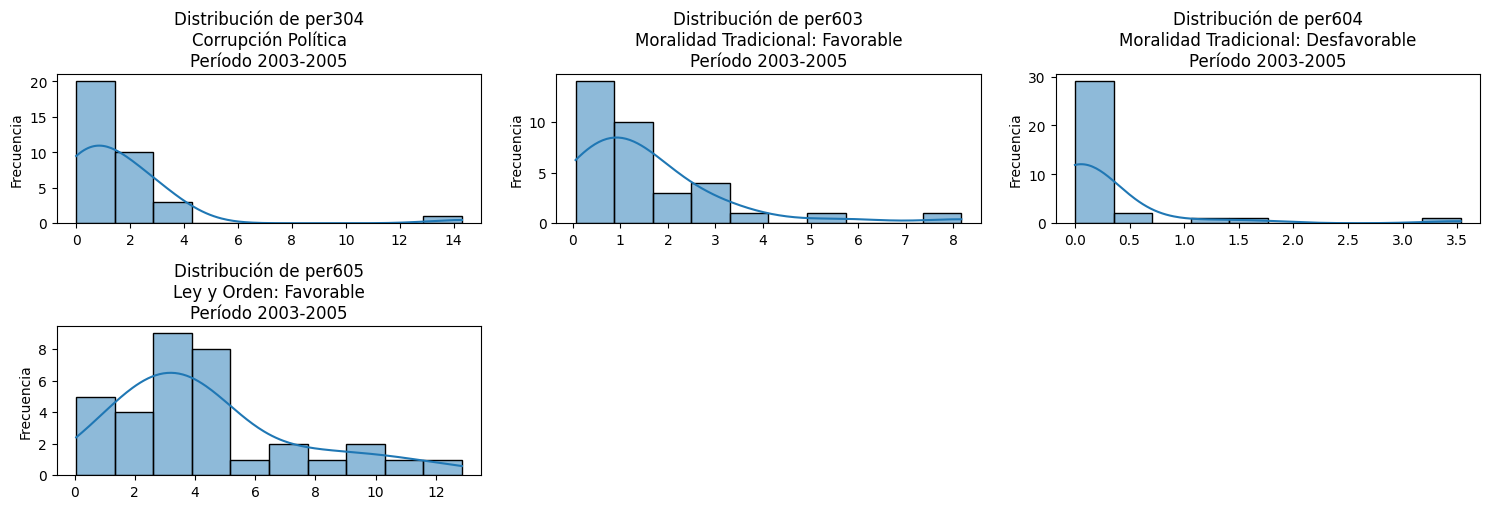

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables 'per' seleccionadas al inicio
selected_variables = variables

# Filtrar el dataframe para estas variables
df_selected = df_periodo[selected_variables]

# Crear un diccionario para mapear cada variable con su detalle desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Estadísticas descriptivas
print(f"Estadísticas descriptivas de las variables seleccionadas (Período {desde} a {hasta}):")
display(df_selected.describe().T)

# Visualizar histogramas
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_selected[var], kde=True, bins=10)
    # Título con el detalle de la variable
    detail = variable_details.get(var, "Detalle no disponible")
    plt.title(f'Distribución de {var}\n{detail}\nPeríodo {desde}-{hasta}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


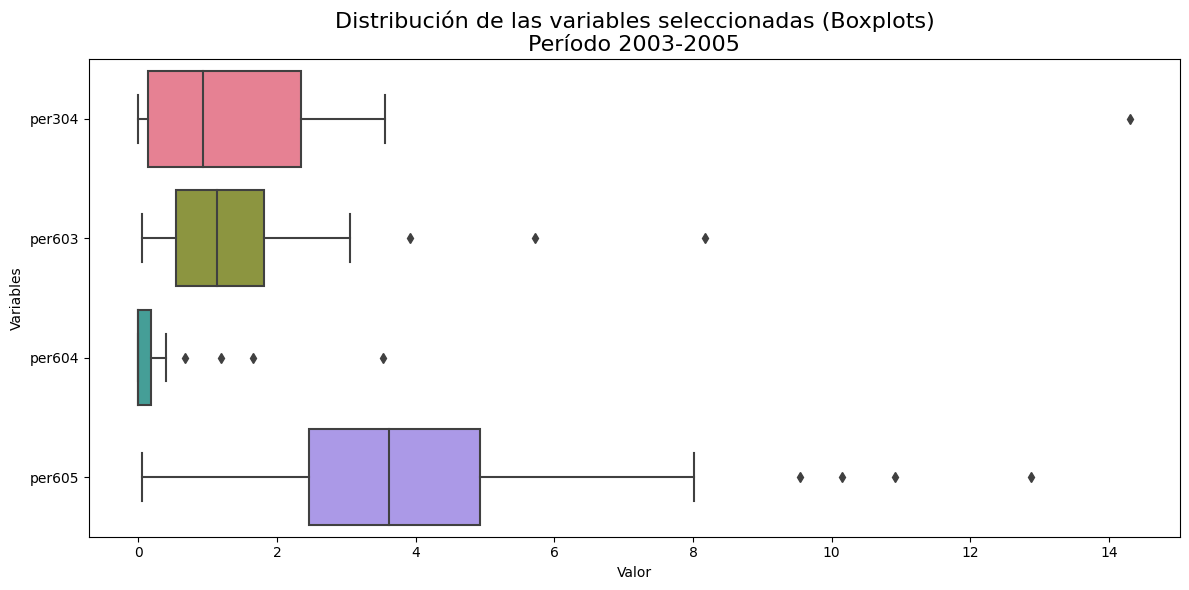

In [24]:
# Crear un único gráfico con los boxplots para las variables en 'selected_variables'
plt.figure(figsize=(12, 6))

# Crear una paleta de colores
palette = sns.color_palette("husl", len(selected_variables))

# Dibujar los boxplots con orientación horizontal
sns.boxplot(data=df_selected[selected_variables], orient="h", palette=palette)

# Configurar el título y etiquetas
plt.title(f'Distribución de las variables seleccionadas (Boxplots)\nPeríodo {desde}-{hasta}', fontsize=16)
plt.xlabel('Valor')
plt.ylabel('Variables')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


In [25]:
if not isinstance(selected_variables, list):
    selected_variables = list(selected_variables)
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()


In [26]:
df_selected

,countryname,agno,per304,per603,per604,per605
0,Argentina,2003,2.725845,0.111139,0.000000,4.606070
1,Armenia,2003,1.163089,1.310186,0.000000,4.145777
2,Australia,2004,0.000000,3.047314,0.027814,0.055706
3,Belgium,2003,0.518447,0.736838,0.199610,10.144140
4,Canada,2004,3.495788,0.427992,0.265743,3.614778
5,Chile,2005,2.352997,0.082658,0.072921,4.133563
6,Denmark,2005,0.000000,0.677497,0.008476,2.398645
7,Estonia,2003,2.655636,1.341353,0.000000,8.007836
8,Finland,2003,0.008652,1.829535,0.000000,2.678686
9,Georgia,2003,3.394278,1.878809,0.000000,4.941823


#### Análisis de outliers

In [27]:
# Asegurar que `df_selected` incluye 'countryname' y 'agno'
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()

# Crear un diccionario para obtener los detalles de las variables 'per' desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Identificar valores extremos usando el rango intercuartílico (IQR)
for var in selected_variables:
    Q1 = df_selected[var].quantile(0.25)  # Primer cuartil
    Q3 = df_selected[var].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Filtrar outliers
    outliers = df_selected[(df_selected[var] < (Q1 - 1.5 * IQR)) | (df_selected[var] > (Q3 + 1.5 * IQR))]
    
    # Mostrar resultados
    print(f"\nVariable: {var}")
    print(f"Descripción: {variable_details.get(var, 'Descripción no disponible')}")
    print(f"Número de outliers: {len(outliers)}")
    
    if not outliers.empty:
        print("Países outliers:")
        countries_outliers = outliers['countryname'].unique()
        print(", ".join(countries_outliers))
        
        # Mostrar detalle de los registros outliers
        display(outliers[['countryname', 'agno', var]])



Variable: per304
Descripción: Corrupción Política
Número de outliers: 1
Países outliers:
Panama


,countryname,agno,per304
22,Panama,2004,14.30782



Variable: per603
Descripción: Moralidad Tradicional: Favorable
Número de outliers: 3
Países outliers:
Israel, Switzerland, United States


,countryname,agno,per603
14,Israel,2003,8.171945
30,Switzerland,2003,5.720959
32,United States,2004,3.921512



Variable: per604
Descripción: Moralidad Tradicional: Desfavorable
Número de outliers: 4
Países outliers:
Israel, Luxembourg, Norway, Switzerland


,countryname,agno,per604
14,Israel,2003,3.532092
16,Luxembourg,2004,1.655041
21,Norway,2005,0.675758
30,Switzerland,2003,1.189436



Variable: per605
Descripción: Ley y Orden: Favorable
Número de outliers: 4
Países outliers:
Belgium, Netherlands, South Africa, United States


,countryname,agno,per605
3,Belgium,2003,10.144140
19,Netherlands,2003,10.917720
27,South Africa,2004,9.547949
32,United States,2004,12.869018


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

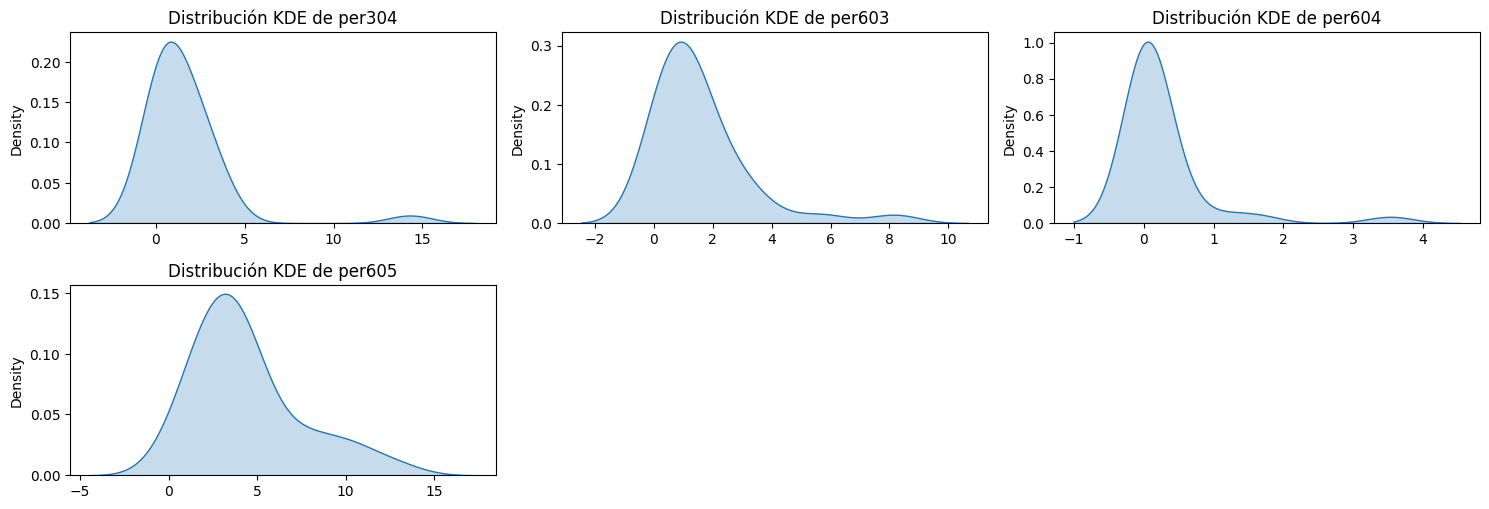

In [28]:
# Visualización KDE
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(df_selected[var], shade=True)
    plt.title(f'Distribución KDE de {var}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


#### Análisis de correlaciones

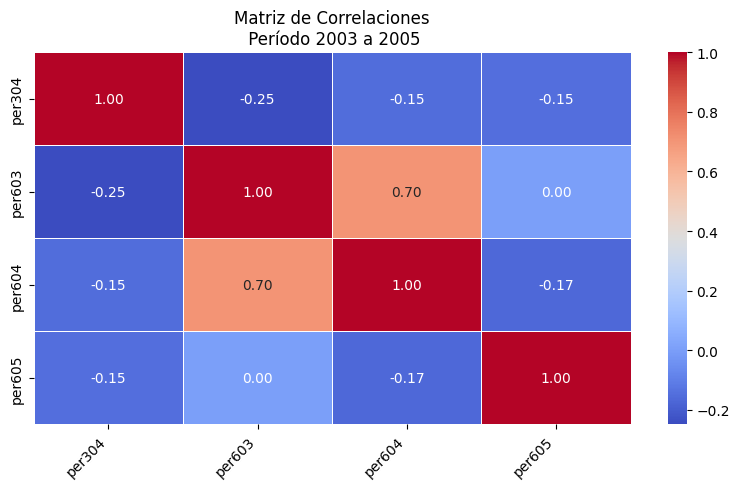

No hay variables con correlación mayor al umbral establecido.


In [29]:
# Seleccionar solo las columnas numéricas para el cálculo de correlaciones
df_selected_numeric = df_selected[selected_variables]

# Calcular la matriz de correlaciones
correlation_matrix = df_selected_numeric.corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f"Matriz de Correlaciones\n Período {desde} a {hasta}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


In [30]:
df_periodo

,agno,countryname,per304,per603,per604,per605
0,2003,Argentina,2.725845,0.111139,0.000000,4.606070
1,2003,Armenia,1.163089,1.310186,0.000000,4.145777
2,2004,Australia,0.000000,3.047314,0.027814,0.055706
3,2003,Belgium,0.518447,0.736838,0.199610,10.144140
4,2004,Canada,3.495788,0.427992,0.265743,3.614778
5,2005,Chile,2.352997,0.082658,0.072921,4.133563
6,2005,Denmark,0.000000,0.677497,0.008476,2.398645
7,2003,Estonia,2.655636,1.341353,0.000000,8.007836
8,2003,Finland,0.008652,1.829535,0.000000,2.678686
9,2003,Georgia,3.394278,1.878809,0.000000,4.941823


In [31]:
df_filtered = df_periodo.copy()
df_filtered

,agno,countryname,per304,per603,per604,per605
0,2003,Argentina,2.725845,0.111139,0.000000,4.606070
1,2003,Armenia,1.163089,1.310186,0.000000,4.145777
2,2004,Australia,0.000000,3.047314,0.027814,0.055706
3,2003,Belgium,0.518447,0.736838,0.199610,10.144140
4,2004,Canada,3.495788,0.427992,0.265743,3.614778
5,2005,Chile,2.352997,0.082658,0.072921,4.133563
6,2005,Denmark,0.000000,0.677497,0.008476,2.398645
7,2003,Estonia,2.655636,1.341353,0.000000,8.007836
8,2003,Finland,0.008652,1.829535,0.000000,2.678686
9,2003,Georgia,3.394278,1.878809,0.000000,4.941823


#### K-MEANS
* Aplicamos el elbow method para determinar un número óptimo de clusters según K-MEANS
* Ejecutamos K Means
* En base a la mayor varianza en los datos originales, elegimos los dos ejes para el gráfico 2D de los Clusters

Análisis de varianza de las variables originales:


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Variable,Varianza
per605,per605,9.090532
per304,per304,6.165334
per603,per603,2.786830
per604,per604,0.447858


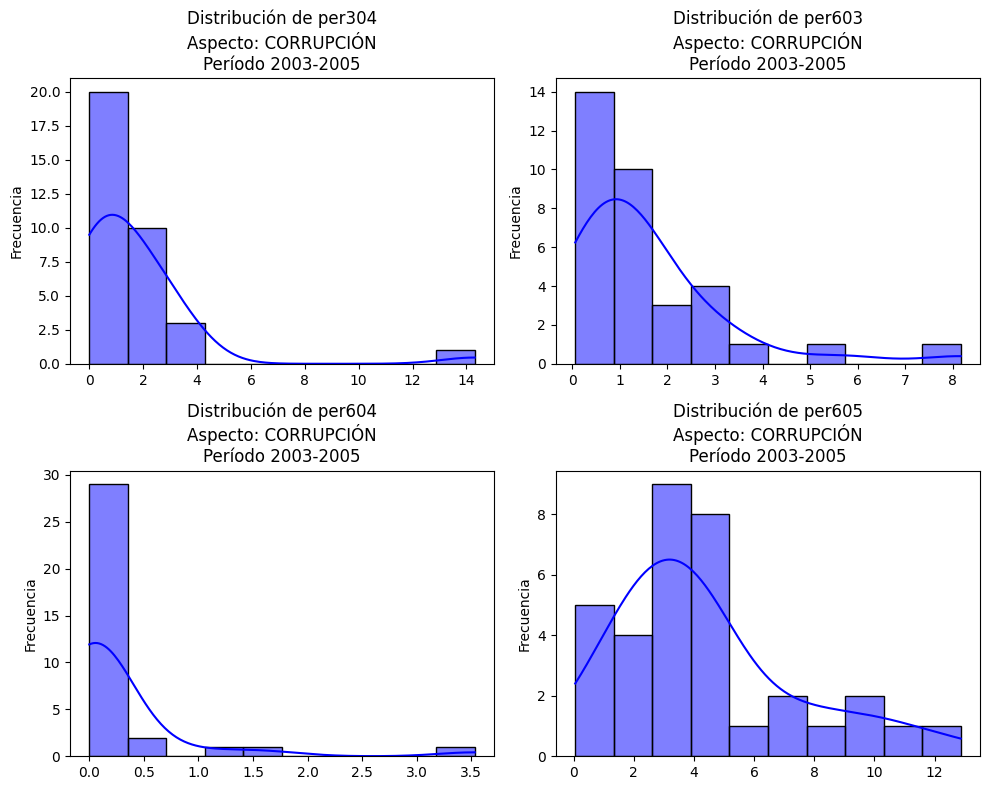


Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per605', 'per304', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/3369514414.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


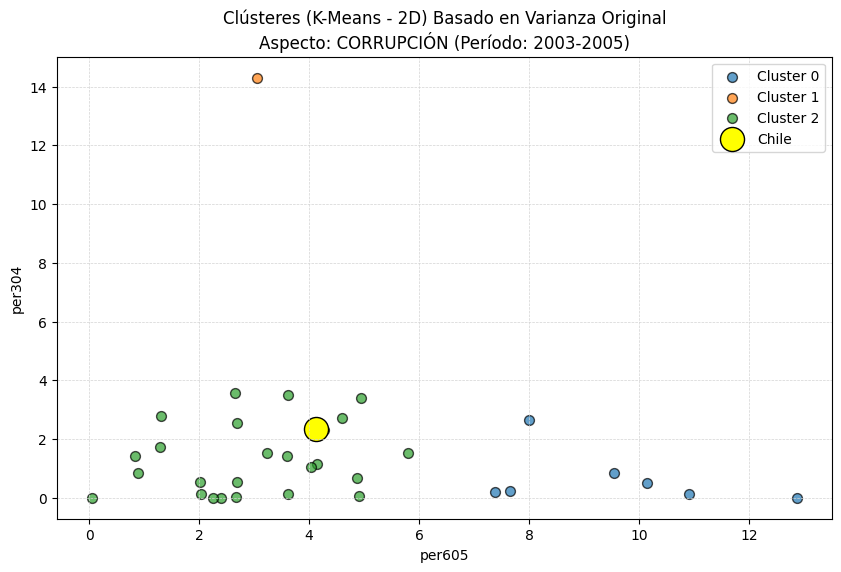

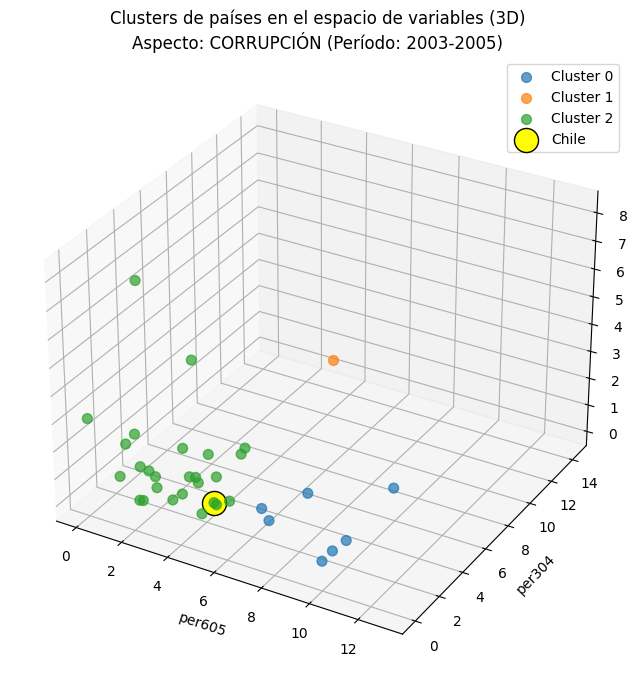


Cluster 0:
Belgium, Estonia, Netherlands, New Zealand, South Africa, United Kingdom, United States

Cluster 1:
Panama

Cluster 2:
Argentina, Armenia, Australia, Canada, Chile, Denmark, Finland, Georgia, Georgia, Germany, Greece, Iceland, Israel, Lithuania, Luxembourg, Mexico, Moldova, Norway, Poland, Romania, Russia, Slovenia, South Korea, Spain, Switzerland, Japan


In [32]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# # Método del codo para encontrar el número óptimo de clusters
# wcss = []  # Suma de los cuadrados dentro del cluster
# K = range(1, 11)

# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# # Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
# diffs = np.diff(wcss)
# k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima

# Graficar el método del codo con línea vertical en el número óptimo de clusters
# plt.figure(figsize=(8, 5))
# plt.plot(K, wcss, 'bx-', label="WCSS")
# plt.axvline(x=k_optimo, color='red', linestyle='--', label=f"K óptimo = {k_optimo}")
# plt.xlabel('Número de clusters (K)')
# plt.ylabel('Suma de los cuadrados dentro del cluster (WCSS)')
# plt.title('El método del codo para encontrar el número óptimo de clusters\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
# plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
# plt.legend()
# plt.show()

# ****************************************************************************
# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)

# Análisis de distribuciones de las variables asociadas
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_filtered[var], kde=True, bins=10, color='blue')
    plt.title(f'Distribución de {var}\nAspecto: {aspecto_filtro}\nPeríodo {desde}-{hasta}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# # Añadir los centroides al gráfico
# plt.scatter(
#     centroids[:, eje_x_idx], centroids[:, eje_y_idx],
#     c='red', s=200, marker='X', edgecolor='black', label="Centroides"
# )

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()



# Gráfico en 3D con las variables seleccionadas
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    ax.scatter(
        cluster_points[top_variables[0]], cluster_points[top_variables[1]], cluster_points[top_variables[2]],
        label=f'Cluster {cluster_id}', s=50, alpha=0.7
    )

# # Añadir los centroides al gráfico 3D
# ax.scatter(
#     centroids[:, eje_x_idx], centroids[:, eje_y_idx], centroids[:, eje_z_idx],
#     c='red', s=200, marker='X', edgecolor='black', label="Centroides"
#)

# Resaltar Chile en el gráfico 3D
if chile_coords is not None:
    ax.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx], chile_coords[eje_z_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
ax.set_xlabel(top_variables[0])
ax.set_ylabel(top_variables[1])
ax.set_zlabel(top_variables[2])
ax.set_title('Clusters de países en el espacio de variables (3D)\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
ax.legend()
plt.show()

# Mostrar los países en cada cluster
df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


#### 2006 a 2008

In [33]:
desde = 2006
hasta = 2008

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())

Filtrado para el período desde 2006 hasta 2008.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
6,2007,Argentina,4.426083,0.000000,0.052607,6.021272
14,2007,Armenia,1.476315,1.341938,0.000000,0.772965
43,2007,Australia,0.061182,4.036423,0.091773,0.000000
66,2006,Austria,0.118129,0.436900,0.964974,5.240394
67,2008,Austria,0.680314,0.537624,0.783789,6.130235


Filtrado para el período desde 2006 hasta 2008.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
6,2007,Argentina,4.426083,0.000000,0.052607,6.021272
14,2007,Armenia,1.476315,1.341938,0.000000,0.772965
43,2007,Australia,0.061182,4.036423,0.091773,0.000000
66,2006,Austria,0.118129,0.436900,0.964974,5.240394
67,2008,Austria,0.680314,0.537624,0.783789,6.130235


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

Análisis de varianza de las variables originales:


,Variable,Varianza
per605,per605,6.490687
per304,per304,3.827229
per603,per603,1.286302
per604,per604,0.104019



Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per605', 'per304', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/2806180986.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


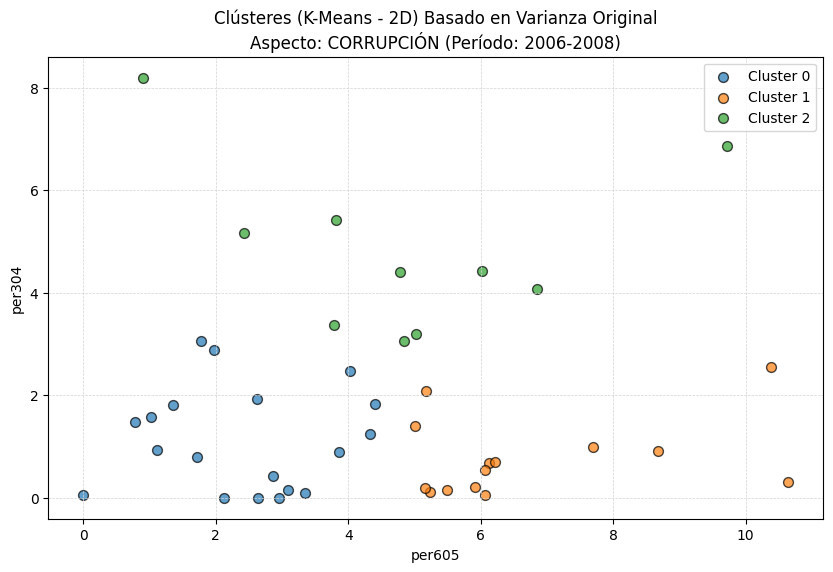


Cluster 0:
Armenia, Australia, Colombia, Cyprus, Denmark, Finland, France, Georgia, Greece, Iceland, Montenegro, New Zealand, North Macedonia, Poland, Russia, Slovenia, South Korea, Ukraine, United States

Cluster 1:
Austria, Austria, Bosnia-Herzegovina, Canada, Czech Republic, Estonia, Ireland, Italy, Netherlands, Romania, Slovakia, Spain, Sweden, Switzerland

Cluster 2:
Argentina, Brazil, Canada, Costa Rica, Latvia, Lithuania, Serbia, Serbia, Turkey, Ukraine


In [34]:
desde = 2006
hasta = 2008

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())
# 
# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima


# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)


# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


Filtrado para el período desde 2009 hasta 2011.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
7,2011,Argentina,0.769591,0.319773,0.093155,2.530538
44,2010,Australia,0.048666,3.201367,0.035830,3.651828
93,2010,Belgium,0.647480,0.780117,0.637065,7.461158
96,2009,Bolivia,2.899064,0.143952,0.190772,4.079466
103,2010,Bosnia-Herzegovina,2.620632,1.100632,0.028643,2.178245


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

Análisis de varianza de las variables originales:


,Variable,Varianza
per605,per605,6.307573
per304,per304,1.819517
per603,per603,1.117677
per604,per604,0.358339



Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per605', 'per304', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/2862228662.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


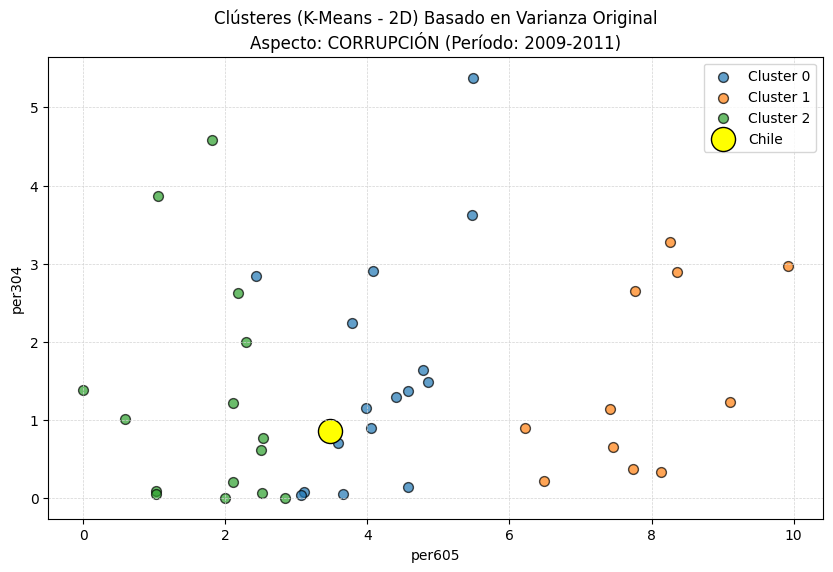


Cluster 0:
Australia, Bolivia, Brazil, Bulgaria, Chile, Colombia, Cyprus, Germany, Latvia, Norway, Panama, Peru, Russia, Slovenia, Sweden, Turkey, United Kingdom

Cluster 1:
Belgium, Canada, Costa Rica, Czech Republic, Estonia, Hungary, Netherlands, Portugal, Portugal, Slovakia, South Africa

Cluster 2:
Argentina, Bosnia-Herzegovina, Denmark, Ecuador, Finland, Iceland, Japan, Latvia, Luxembourg, Moldova, Moldova, Montenegro, New Zealand, Poland, Spain


In [35]:
desde = 2009
hasta = 2011

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())
# 
# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima


# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)


# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


Filtrado para el período desde 2012 hasta 2014.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
8,2013,Argentina,2.650272,0.000000,0.000000,4.164426
15,2012,Armenia,0.635251,0.824054,0.000000,0.743740
45,2013,Australia,0.175274,2.498448,0.582004,1.069951
68,2013,Austria,2.420273,1.498530,0.971414,2.828695
94,2014,Belgium,0.285601,0.463670,0.667955,5.018993


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

Análisis de varianza de las variables originales:


,Variable,Varianza
per304,per304,4.769290
per605,per605,3.731044
per603,per603,0.737641
per604,per604,0.200201



Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per304', 'per605', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/211493160.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


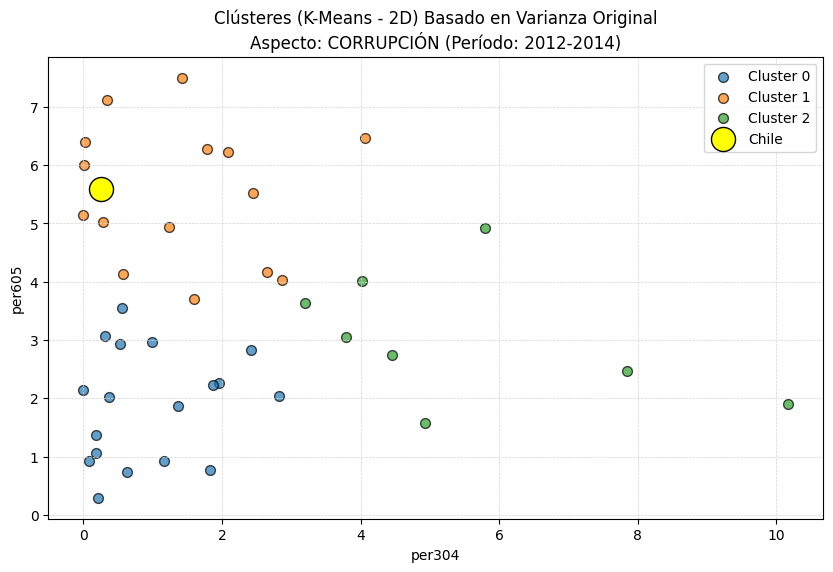


Cluster 0:
Armenia, Australia, Austria, Georgia, Germany, Greece, Hungary, Iceland, Japan, Latvia, Luxembourg, Montenegro, New Zealand, Romania, Serbia, South Korea, United States, Uruguay

Cluster 1:
Argentina, Belgium, Brazil, Chile, Colombia, Czech Republic, France, Italy, Lithuania, Netherlands, Norway, Panama, Slovakia, Slovenia, South Africa, Sweden

Cluster 2:
Bolivia, Bosnia-Herzegovina, Bulgaria, Costa Rica, Dominican Republic, Moldova, Ukraine, Ukraine


In [36]:
desde = 2012
hasta = 2014

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())
# 
# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima


# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)


# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


Filtrado para el período desde 2015 hasta 2017.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
9,2015,Argentina,3.338516,0.436051,0.000000,5.530457
16,2017,Armenia,2.762253,0.625387,0.000000,0.906615
46,2016,Australia,0.967849,0.080241,0.084099,4.219243
69,2017,Austria,2.088512,1.662783,0.555354,4.998507
117,2017,Bulgaria,0.906179,1.762263,0.459292,9.139930


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

Análisis de varianza de las variables originales:


,Variable,Varianza
per605,per605,5.140275
per304,per304,1.928204
per603,per603,0.810810
per604,per604,0.152623



Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per605', 'per304', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/4277465462.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


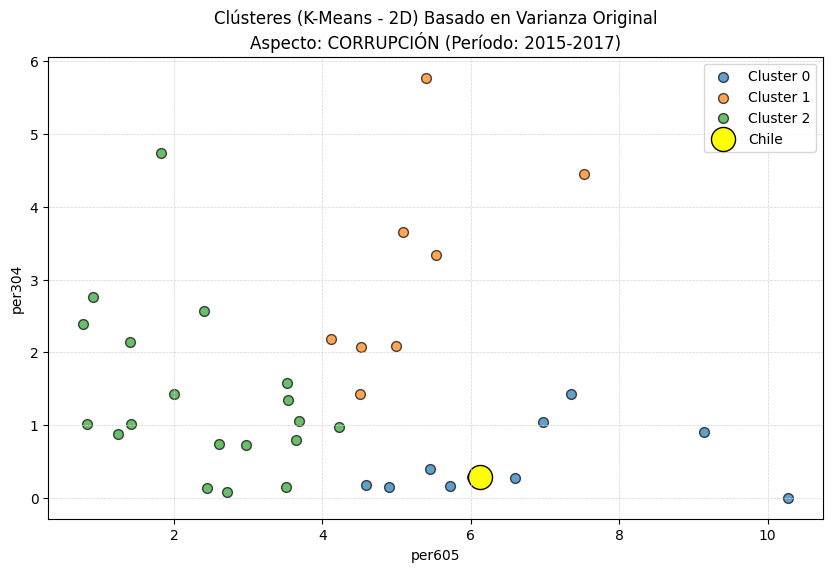


Cluster 0:
Bulgaria, Canada, Chile, Denmark, Estonia, France, Netherlands, Slovakia, Switzerland, United Kingdom, United Kingdom

Cluster 1:
Argentina, Austria, Dominican Republic, Ireland, Lithuania, Mexico, Poland, Portugal

Cluster 2:
Armenia, Australia, Croatia, Cyprus, Czech Republic, Finland, Georgia, Germany, Iceland, Israel, Japan, New Zealand, Norway, Romania, Serbia, South Korea, Spain, Turkey, United States


In [37]:
desde = 2015
hasta = 2017

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())
# 
# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima


# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)


# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


Filtrado para el período desde 2018 hasta 2020.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
10,2019,Argentina,6.263886,0.080290,0.000000,3.404865
17,2018,Armenia,3.859460,0.105532,0.000000,3.398821
47,2019,Australia,1.084822,0.000000,0.051265,4.822758
70,2019,Austria,1.526862,0.942597,0.293947,6.896474
95,2019,Belgium,0.271362,0.354024,0.994098,5.774432


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

Análisis de varianza de las variables originales:


,Variable,Varianza
per304,per304,5.150119
per605,per605,4.411840
per603,per603,1.260849
per604,per604,0.067419



Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per304', 'per605', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/1077749378.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


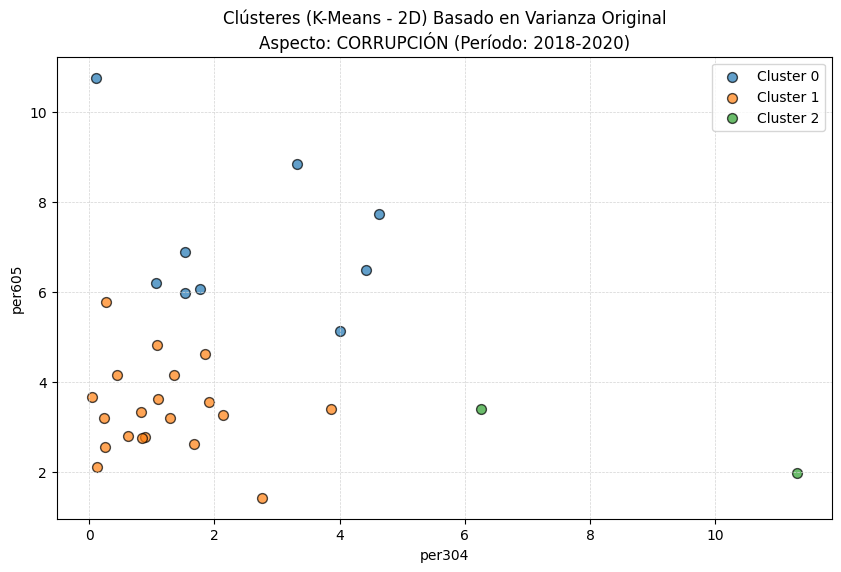


Cluster 0:
Austria, Brazil, Canada, Italy, Latvia, Mexico, Moldova, South Africa, Sweden

Cluster 1:
Armenia, Australia, Belgium, Denmark, Estonia, Finland, Georgia, Greece, Hungary, Lithuania, Montenegro, New Zealand, Panama, Portugal, Slovenia, South Korea, Spain, Turkey, United Kingdom, United States

Cluster 2:
Argentina, Ukraine


In [38]:
desde = 2018
hasta = 2020

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())
# 
# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima


# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)


# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


Filtrado para el período desde 2021 hasta 2023.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per304', 'per603', 'per604', 'per605']


,agno,countryname,per304,per603,per604,per605
18,2021,Armenia,1.583356,0.275558,0.011995,1.220453
48,2022,Australia,2.414937,0.428861,0.092963,2.718028
112,2022,Brazil,2.607546,1.219753,0.000000,4.434843
149,2021,Chile,0.658547,0.902457,1.166186,4.845540
275,2021,Germany,0.663831,1.733800,0.665239,5.519084


Análisis de varianza de las variables originales:


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Variable,Varianza
per605,per605,15.852518
per304,per304,0.740195
per603,per603,0.279419
per604,per604,0.206857



Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per605', 'per304', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_19560/3715420550.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


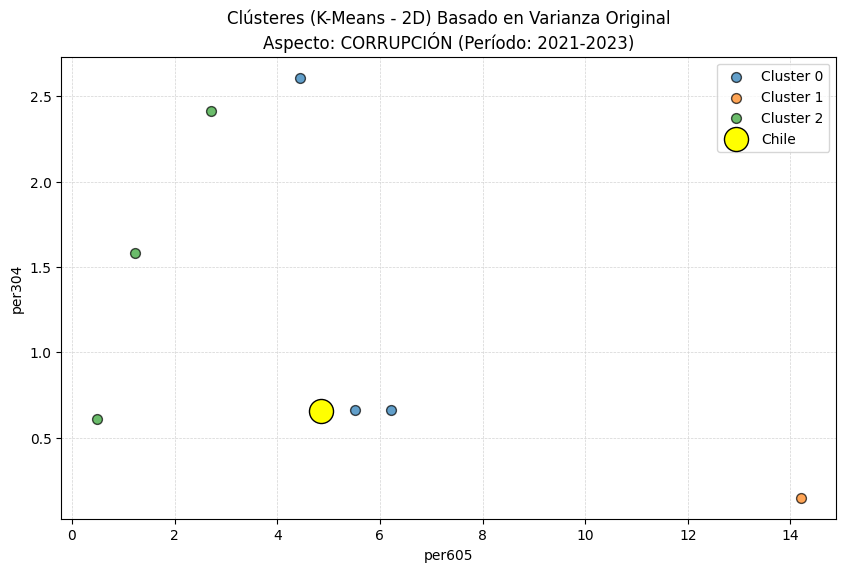


Cluster 0:
Brazil, Chile, Germany, Netherlands

Cluster 1:
Sweden

Cluster 2:
Armenia, Australia, Iceland


In [39]:
desde = 2021
hasta = 2023

if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())
# 
# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
# wcss = []  # Suma de los cuadrados dentro del cluster
# K = range(1, 11)

# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
# diffs = np.diff(wcss)
# k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima


# Aplicar K-MEANS con el número óptimo de clusters
# kmeans = KMeans(n_clusters=k_optimo, random_state=42)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)


# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


In [40]:
df_filtered

,agno,countryname,per304,per603,per604,per605,Cluster
18,2021,Armenia,1.583356,0.275558,0.011995,1.220453,2
48,2022,Australia,2.414937,0.428861,0.092963,2.718028,2
112,2022,Brazil,2.607546,1.219753,0.000000,4.434843,0
149,2021,Chile,0.658547,0.902457,1.166186,4.845540,0
275,2021,Germany,0.663831,1.733800,0.665239,5.519084,0
316,2021,Iceland,0.608956,0.000000,0.049931,0.477620,2
472,2021,Netherlands,0.660503,1.072211,0.854853,6.225597,0
649,2022,Sweden,0.149136,0.565733,0.954589,14.207415,1


In [41]:
df

,agno,countryname,ventana_10,ventana_5,tipovoto,per101,per102,per103,per104,per105,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,1997,Albania,190,16,pervote,1.770988,0.000000,0.031388,3.046506,0.015910,...,2.021481,0.0,0.0,0.0,0.0,0.0,0.637892,0.363756,0.0,0.0
1,2001,Albania,200,17,pervote,2.392570,0.000000,0.000000,2.757403,0.026619,...,0.989546,0.0,0.0,0.0,0.0,0.0,0.897238,0.508457,0.0,0.0
2,1989,Argentina,180,14,presvote,0.000000,0.000000,4.619213,0.448618,0.828036,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,1995,Argentina,190,16,presvote,0.061642,0.020140,0.143247,0.882433,0.083005,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,1999,Argentina,190,16,presvote,0.192543,0.000000,0.582363,0.524400,0.017829,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,200,18,pervote,1.978711,0.088485,0.044020,5.839310,0.088485,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
735,2012,United States,210,19,presvote,0.505120,0.161887,0.189797,7.527242,1.491961,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
736,2016,United States,210,20,presvote,0.866280,0.111349,0.000000,5.807609,0.763045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
737,2020,United States,220,21,presvote,1.190682,0.129249,0.161450,5.565559,1.951804,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
